In [124]:
import numpy 
import matplotlib.pyplot as plt

In [42]:
import torch


dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

99 1030.6397705078125
199 15.94222640991211
299 0.46739450097084045
399 0.01855071820318699
499 0.0011985002784058452


Now we are using autograd function for gradient

In [98]:
import torch

dtype = torch.float
device = torch.device("cpu")
dtype = torch.float
#device = torch.device("cuda:0") # Uncomment this to run on GPU
x = torch.randn(100 , dtype = dtype)
y = x*(2.0) + torch.randn(100 , dtype = dtype)

<function Tensor.type>

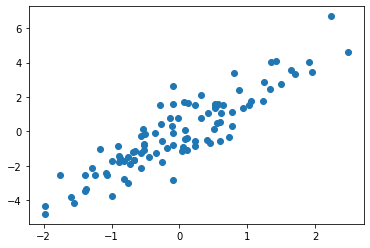

In [101]:
plt.scatter(x , y)

In [114]:
w = torch.randn(1 ,dtype = dtype ,requires_grad = True)
b = torch.randn(1 , dtype = dtype,requires_grad = True)
yb = w*x + b
learning_rate = 5e-3

In [118]:
for i in range(1400):
    y_pred = w*x + b
    loss = (y_pred - y).pow(2).sum()
    if i % 100 == 99:
        print(i, loss.item())

    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Manually zero the gradients after updating weights
        w.grad.zero_()
        b.grad.zero_()

99 90.84534454345703
199 90.84534454345703
299 90.84534454345703
399 90.84534454345703
499 90.84534454345703
599 90.84534454345703
699 90.84534454345703
799 90.84534454345703
899 90.84534454345703
999 90.84534454345703
1099 90.84534454345703
1199 90.84534454345703
1299 90.84534454345703
1399 90.84534454345703


In [127]:
y_pred = y_pred.detach().numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

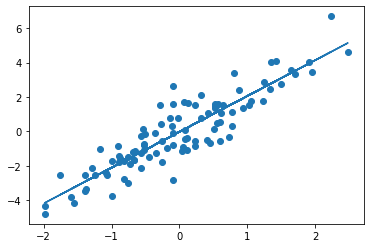

In [129]:
plt.scatter(x,y)
plt.plot(x , y_pred)
plt.show()